In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import csv

In [37]:
#read in data
threeK_fractal_data = pd.DataFrame(pd.read_csv("data/3000_particles.csv", dtype=np.float64))

oneK_fractal_data = pd.DataFrame(pd.read_csv("data/1000endNum.csv", dtype=np.float64))

def fractal_sorter(fractal_data):
    #convert each set of data to numpy array
    rawNumParticles = fractal_data.numParticles.to_numpy()
    rawClusterRadius = fractal_data.clusterRadius.to_numpy()


    #array of indexes of where a new fractal starts
    sliceNum = 10
    where_isTen = np.where(rawNumParticles == sliceNum)

    #initialise empty array to store each fractal
    previousIndex = 0
    slicedNumParticles = []
    slicedClusterRadius = []

    #slices fractal data up
    for i in where_isTen[0]:

        temp_numParticles = rawNumParticles[previousIndex: i]
        temp_ClusterRadius = rawClusterRadius[previousIndex: i]
        
        slicedNumParticles.append(temp_numParticles)
        slicedClusterRadius.append(temp_ClusterRadius)

        previousIndex = i
        
    #appends final fractal data
    slicedNumParticles.append(rawNumParticles[previousIndex:])
    slicedClusterRadius.append(rawClusterRadius[previousIndex:])

    #gets rid of 0th row that was empty
    slicedNumParticles = slicedNumParticles[1:]
    slicedClusterRadius = slicedClusterRadius[1:]
    
    return slicedNumParticles, slicedClusterRadius


In [38]:
#find average cluster radius at each particle number

def getAverage(particleList, radiusList):
    numFractals = len(particleList)
    numValues = len(radiusList[0])
    meanSizes = np.zeros(numValues)
    meanSquareSizes = np.zeros(numValues)
    SizeErrors = np.zeros(numValues)
    ln_errors = []
    
    #calculates average clusterRadius
    for i in range(numFractals):
        for j in range(numValues):
            meanSizes[j] += radiusList[i][j]/numFractals
            meanSquareSizes[j] += (radiusList[i][j]**2)/numFractals

    for k in range(numValues):
        SizeErrors[k] += (1/np.sqrt(numFractals-1)) * np.sqrt(meanSquareSizes[k] - meanSizes[k]**2)
        #print(SizeErrors[k])
        
    for l in range(numValues):
        ln_errors.append(SizeErrors[l] / meanSizes[l])
            
    return meanSizes, ln_errors


In [39]:
#process 3000 particle fractals

threeK_numParticles = fractal_sorter(threeK_fractal_data)[0]
threeK_clusterRadius = fractal_sorter(threeK_fractal_data)[1]
threeK_meanClusterSize = getAverage(threeK_numParticles, threeK_clusterRadius)[0]

threeK_log_clusterSize = np.log(threeK_meanClusterSize)
threeK_log_numParticles = np.log(threeK_numParticles)[0]
threeK_errors = getAverage(threeK_numParticles, threeK_clusterRadius)[1]

#process 2000 particle fractals

#process 1000 particle fractals
oneK_numParticles = fractal_sorter(oneK_fractal_data)[0]
oneK_clusterRadius = fractal_sorter(oneK_fractal_data)[1]
oneK_meanClusterSize = getAverage(oneK_numParticles, oneK_clusterRadius)[0]

oneK_log_clusterSize = np.log(oneK_meanClusterSize)
oneK_log_numParticles = np.log(oneK_numParticles)[0]
oneK_errors = getAverage(oneK_numParticles, oneK_clusterRadius)[1]

In [40]:
#function to calculate fractal dimension fd

def best_fit(x, slope , intercept):
    return slope*x + intercept

def getFracalDim(ln_numParticles, ln_clusterSize):
    
    popt, pcov = curve_fit(best_fit, ln_clusterSize, ln_numParticles)
    fd = popt[0]   
    fd_err = np.sqrt(np.diag(pcov))[0]
    
    return fd, fd_err
    
    
def getFractalDim_nth(numParticles, clusterSize, N):
    tempSizes, tempNums = [], []
    
    if N ==0:
        N = 1
        
  #  print(f"N = {N}")
    
    for i in range (len(numParticles)):
        cutOffIndex = np.where(numParticles[i] == N)[0][0]
       # print(f"cutoff index = {cutOffIndex}")
        tempSizes.append(clusterSize[0:cutOffIndex+1])
        tempNums.append(numParticles[0][0:cutOffIndex+1])
     
    tempSizes = tempSizes[0]
    tempNums = tempNums[0]
    
    #now calculate fractal dim
    fd = getFracalDim(np.log(tempNums), np.log(tempSizes))[0]
    fd_err = getFracalDim(np.log(tempNums), np.log(tempSizes))[1]
    
    return fd, fd_err

In [41]:
getFractalDim_nth(threeK_numParticles, threeK_meanClusterSize, 30)
#only works from size 30 upwards?

(1.4663412300149556, 0.14491386545205795)

In [42]:
max(threeK_numParticles[0])

3000.0

In [58]:
k = 3
fd, fd_err, count = [], [], []

#while k <= np.max(threeK_numParticles[0]):
 #   temp_fd = getFractalDim_nth(threeK_numParticles, threeK_meanClusterSize, k)[0]
  #  fd.append()
 #   print(f"temp fractal dim = {temp_fd}")
  #  k += 10

while k <= len(threeK_numParticles[0]):
    l = k*10
    temp_fd, temp_fd_err = getFractalDim_nth(threeK_numParticles, threeK_meanClusterSize, l)
    
    fd.append(temp_fd)
    fd_err.append(temp_fd_err)
    count.append(l)
    
   # print(f"temp fractal dim = {temp_fd}")
    k += 1
    #k += 10

#for k in range(len(threeK_numParticles[0])):
    
 #   fd, fd_err, count = [], [], []
  #  l=10*k
    
   # temp_fd = getFractalDim_nth(threeK_numParticles, threeK_meanClusterSize, l)[0]

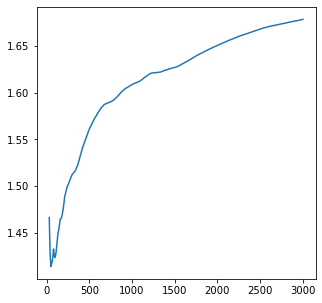

In [60]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(count, fd)


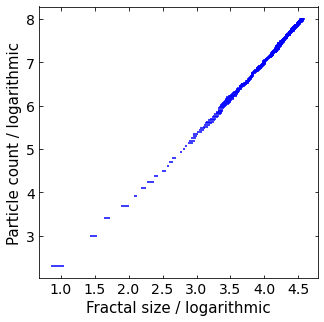

In [48]:
#plotting

fig, ax = plt.subplots(figsize=(5,5))  

#graph formatting
ax.set_xlabel("Fractal size / logarithmic", fontsize=15)
ax.set_ylabel("Particle count / logarithmic", fontsize=15)
plt.xticks(fontsize=14)                 
plt.yticks(fontsize=14) 
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True) 
    
ax.errorbar(threeK_log_clusterSize, threeK_log_numParticles, yerr=None, xerr=threeK_errors, color='blue', linestyle='')

#ax.errorbar(oneK_log_raddii, oneK_log_numParticles, yerr=None, xerr=oneK_errors, color='red')

plt.show()

In [46]:
#now want to calculate fractal dimension for different clusterSizes

